In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings(action='ignore')

In [4]:
data = pd.read_csv('data/data_final.csv')

In [5]:
data

,Race_ID,Trap,Odds,BSP,Public_Estimate,Last_Run,Distance_All,Finish_All,Distance_Places_All,Races_All,...,Early_380,Grade_380,Time_380,Early_Time_380,Stay_380,Favourite,Finished,Wide_380,Dist_By,Winner
0,0,6,2.75,4.00,1,12,456.47,4.09,402.86,17,...,2.000000,4.00,17.84,3.63,0.500000,6.0,4,0.000000,-10.50000,0
1,0,3,5.00,7.60,4,5,410.48,3.53,414.00,21,...,3.430000,3.29,24.18,3.70,0.280000,6.0,1,0.140000,-4.71000,1
2,0,5,5.00,9.40,6,9,386.45,3.39,380.00,31,...,3.430000,3.71,24.06,3.67,-0.430000,6.0,3,0.000000,-2.86000,0
3,0,4,7.00,7.80,5,9,380.00,3.03,380.00,21,...,2.430000,4.43,24.14,3.65,0.280000,6.0,2,0.000000,-2.71000,0
4,0,2,5.00,5.10,2,13,385.00,2.59,388.33,40,...,3.140000,2.71,24.05,3.64,-0.430000,6.0,6,0.000000,-2.32000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12001,2000,4,3.50,4.67,3,4,408.19,3.25,383.91,52,...,5.000000,5.71,24.13,3.75,-2.000000,1.0,4,0.000000,-3.50000,0
12002,2000,2,7.00,9.36,6,8,418.62,3.82,412.00,58,...,5.000000,4.86,20.81,3.73,-0.290000,1.0,3,0.000000,-12.43000,0
12003,2000,5,5.00,4.35,2,7,400.00,4.05,410.00,9,...,4.750000,6.00,24.36,3.74,-0.750000,1.0,6,0.000000,-4.75000,0
12004,2000,1,4.00,3.86,1,3,436.36,4.82,442.00,22,...,3.487433,5.71,24.13,3.74,-0.056749,1.0,2,0.068085,-4.48688,0


In [6]:
data.tail()

,Race_ID,Trap,Odds,BSP,Public_Estimate,Last_Run,Distance_All,Finish_All,Distance_Places_All,Races_All,...,Early_380,Grade_380,Time_380,Early_Time_380,Stay_380,Favourite,Finished,Wide_380,Dist_By,Winner
12001,2000,4,3.5,4.67,3,4,408.19,3.25,383.91,52,...,5.000000,5.71,24.13,3.75,-2.000000,1.0,4,0.000000,-3.50000,0
12002,2000,2,7.0,9.36,6,8,418.62,3.82,412.00,58,...,5.000000,4.86,20.81,3.73,-0.290000,1.0,3,0.000000,-12.43000,0
12003,2000,5,5.0,4.35,2,7,400.00,4.05,410.00,9,...,4.750000,6.00,24.36,3.74,-0.750000,1.0,6,0.000000,-4.75000,0
12004,2000,1,4.0,3.86,1,3,436.36,4.82,442.00,22,...,3.487433,5.71,24.13,3.74,-0.056749,1.0,2,0.068085,-4.48688,0
12005,2000,3,5.0,8.31,5,4,418.18,5.66,422.50,22,...,4.670000,5.00,16.35,3.77,0.160000,1.0,5,0.170000,-21.00000,0


In [7]:
data.dtypes

Race_ID                  int64
Trap                     int64
Odds                   float64
BSP                    float64
Public_Estimate          int64
Last_Run                 int64
Distance_All           float64
Finish_All             float64
Distance_Places_All    float64
Races_All                int64
Distance_Recent        float64
Finish_Recent          float64
Odds_Recent            float64
Early_Recent           float64
Races_380                int64
Wins_380               float64
Finish_380             float64
Odds_380               float64
Early_380              float64
Grade_380              float64
Time_380               float64
Early_Time_380         float64
Stay_380               float64
Favourite              float64
Finished                 int64
Wide_380               float64
Dist_By                float64
Winner                   int64
dtype: object

In [8]:
data.isnull().sum()

Race_ID                0
Trap                   0
Odds                   0
BSP                    0
Public_Estimate        0
Last_Run               0
Distance_All           0
Finish_All             0
Distance_Places_All    0
Races_All              0
Distance_Recent        0
Finish_Recent          0
Odds_Recent            0
Early_Recent           0
Races_380              0
Wins_380               0
Finish_380             0
Odds_380               0
Early_380              0
Grade_380              0
Time_380               0
Early_Time_380         0
Stay_380               0
Favourite              0
Finished               0
Wide_380               0
Dist_By                0
Winner                 0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.describe()

,Race_ID,Trap,Odds,BSP,Public_Estimate,Last_Run,Distance_All,Finish_All,Distance_Places_All,Races_All,...,Early_380,Grade_380,Time_380,Early_Time_380,Stay_380,Favourite,Finished,Wide_380,Dist_By,Winner
count,12006.00000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,...,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000
mean,1000.00000,3.500000,5.371940,7.600623,3.501916,7.149592,400.232647,3.666011,399.435106,62.054223,...,3.488412,5.703423,24.042455,3.703312,-0.058871,3.442533,3.499500,0.068360,-4.473741,0.166667
std,577.66293,1.707896,2.208432,4.255454,1.706236,3.346557,28.816968,0.527866,28.957759,56.200429,...,1.008654,1.797255,1.290984,0.061315,1.089164,1.744878,1.708042,0.152352,3.036172,0.372694
min,0.00000,1.000000,1.670000,1.830000,1.000000,2.000000,306.670000,1.830000,307.570000,2.000000,...,1.000000,1.000000,0.000000,3.500000,-5.000000,1.000000,1.000000,0.000000,-50.000000,0.000000
25%,500.00000,2.000000,4.000000,4.610000,2.000000,5.000000,380.000000,3.320000,380.000000,23.000000,...,2.710000,4.500000,24.120000,3.660000,-0.800000,2.000000,2.000000,0.000000,-5.430000,0.000000
50%,1000.00000,3.500000,5.000000,6.400000,4.000000,7.000000,389.520000,3.610000,388.000000,44.000000,...,3.487433,6.000000,24.310000,3.700000,0.000000,3.000000,3.000000,0.000000,-4.000000,0.000000
75%,1500.00000,5.000000,6.000000,9.290000,5.000000,8.000000,413.995000,3.920000,412.967500,84.000000,...,4.140000,7.290000,24.510000,3.740000,0.710000,5.000000,5.000000,0.068085,-2.750000,0.000000
max,2000.00000,6.000000,21.000000,44.000000,6.000000,28.000000,573.160000,7.270000,579.550000,462.000000,...,6.000000,8.000000,25.660000,4.210000,5.000000,6.000000,6.000000,1.000000,11.000000,1.000000


In [11]:
data.corr()

,Race_ID,Trap,Odds,BSP,Public_Estimate,Last_Run,Distance_All,Finish_All,Distance_Places_All,Races_All,...,Early_380,Grade_380,Time_380,Early_Time_380,Stay_380,Favourite,Finished,Wide_380,Dist_By,Winner
Race_ID,1.000000e+00,-2.152847e-15,0.007352,0.015184,0.001073,0.012864,-0.006404,-0.010224,-0.002840,-0.000748,...,-0.005243,-0.013235,-0.003040,-0.016179,0.001936,-3.335000e-03,0.000089,0.015436,0.000768,-9.881949e-16
Trap,-2.152847e-15,1.000000e+00,-0.039046,-0.010928,0.000086,-0.008774,-0.070820,0.008526,-0.072892,-0.001243,...,-0.287677,0.002056,0.006039,-0.333588,0.277346,-2.822127e-17,0.016462,0.440070,0.023114,-3.729661e-03
Odds,7.351773e-03,-3.904637e-02,1.000000,0.873613,0.755081,0.075256,0.061957,0.079152,0.061931,0.145791,...,0.071284,0.028887,0.039025,0.143950,0.027532,8.341469e-04,0.207712,-0.028672,-0.071668,-1.597836e-01
BSP,1.518420e-02,-1.092826e-02,0.873613,1.000000,0.804775,0.072149,0.059474,0.090383,0.059333,0.156367,...,0.060096,0.055517,0.043502,0.143650,0.043106,7.842387e-03,0.223872,-0.008039,-0.078610,-1.638952e-01
Public_Estimate,1.073486e-03,8.575481e-05,0.755081,0.804775,1.000000,0.055779,0.061839,0.079254,0.061142,0.158367,...,0.042026,0.028831,0.031984,0.117031,0.054093,-1.221839e-03,0.224945,-0.013766,-0.071505,-1.796346e-01
Last_Run,1.286354e-02,-8.773535e-03,0.075256,0.072149,0.055779,1.000000,-0.008557,0.039175,-0.004500,-0.003015,...,0.006887,-0.032391,0.019982,0.009531,0.048829,3.765005e-03,0.033326,0.021089,-0.049024,-1.825494e-03
Distance_All,-6.403728e-03,-7.081980e-02,0.061957,0.059474,0.061839,-0.008557,1.000000,0.007917,0.935596,0.086732,...,0.166314,0.001335,-0.006385,0.177885,-0.120160,-9.467972e-03,0.018103,-0.029313,0.010788,-2.680649e-02
Finish_All,-1.022402e-02,8.525830e-03,0.079152,0.090383,0.079254,0.039175,0.007917,1.000000,-0.019067,-0.216865,...,0.245390,0.343719,-0.063403,0.373905,0.152343,1.169319e-02,0.069775,0.016793,-0.440186,-2.756336e-02
Distance_Places_All,-2.840361e-03,-7.289194e-02,0.061931,0.059333,0.061142,-0.004500,0.935596,-0.019067,1.000000,0.113777,...,0.171412,0.001758,-0.001194,0.183920,-0.114033,-1.247416e-02,0.015190,-0.029622,0.000036,-2.798433e-02
Races_All,-7.481375e-04,-1.243172e-03,0.145791,0.156367,0.158367,-0.003015,0.086732,-0.216865,0.113777,1.000000,...,-0.115735,0.018640,0.060019,-0.002159,0.115000,-9.260798e-03,0.007353,-0.004473,0.038754,-2.314764e-02


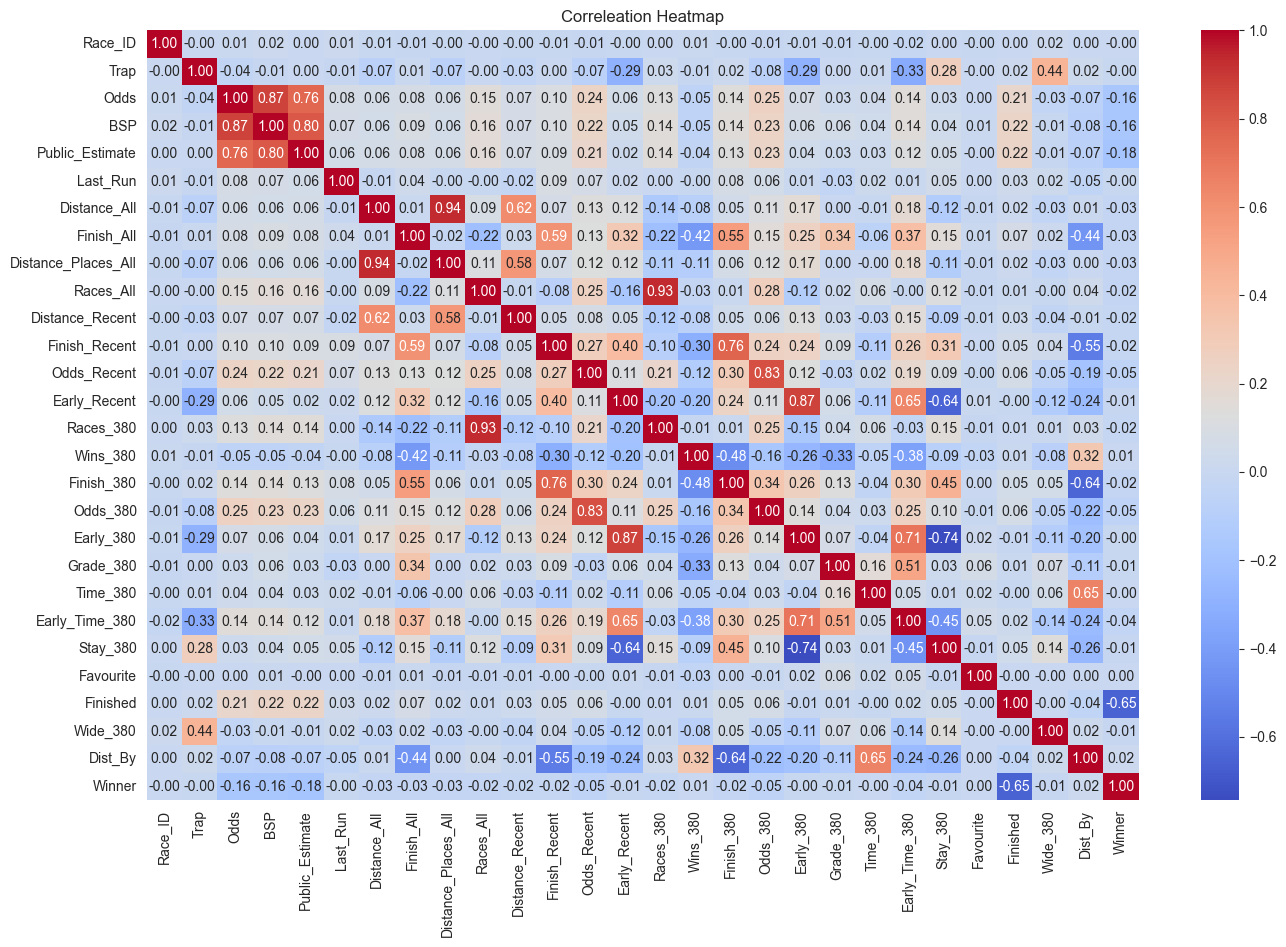

In [12]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correleation Heatmap")
plt.show()

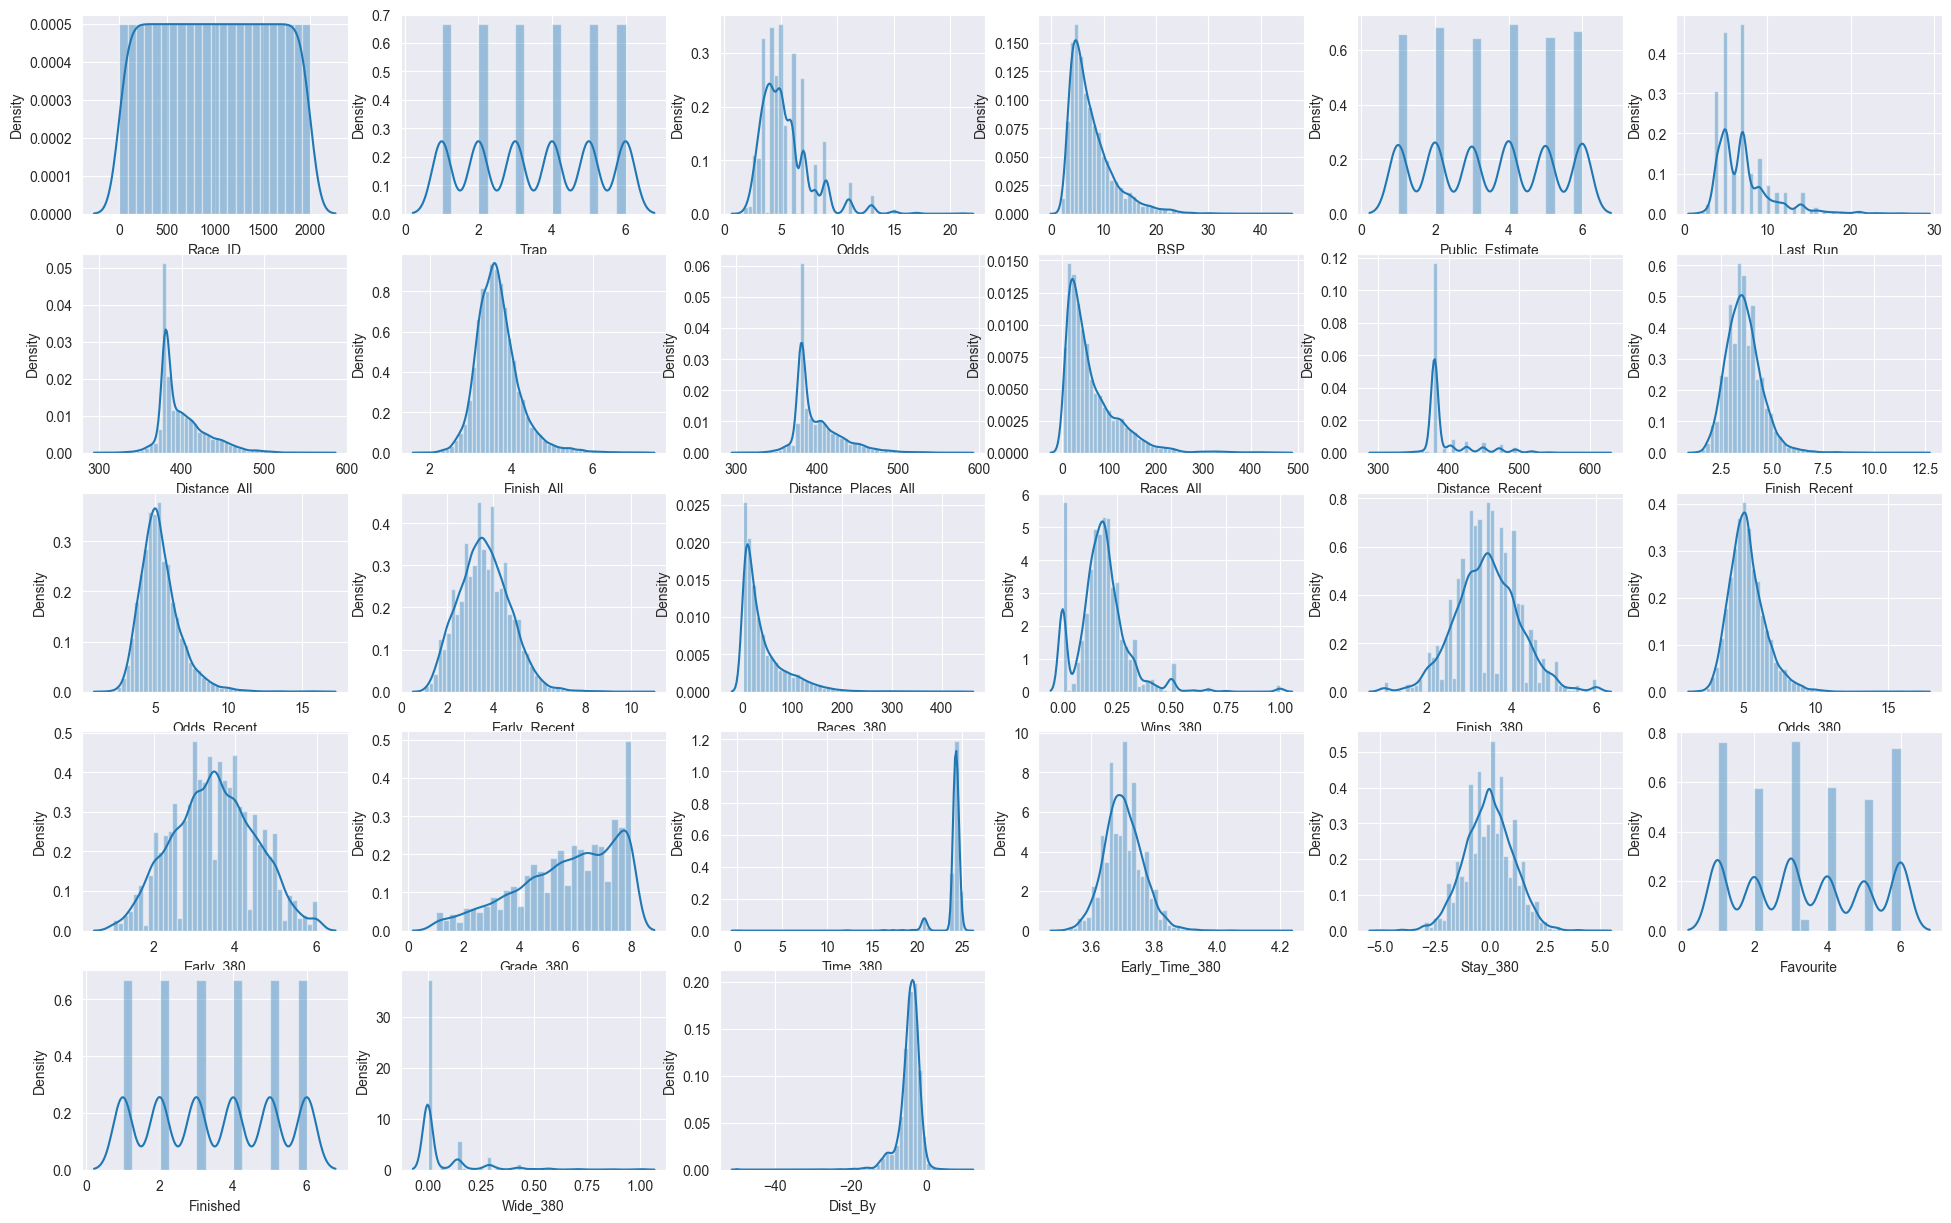

In [13]:
non_binary_columns = [column for column in data.columns if len(data[column].unique()) > 2]

plt.figure(figsize=(24, 15))
for i in range(len(non_binary_columns)):
    plt.subplot(5, 6, i + 1)
    sns.distplot(data[non_binary_columns[i]])
plt.show()

In [14]:
def preprocess_inputs(df, target='Winner'):
    df = df.copy()
    df = df.drop('Race_ID', axis=1)

    if target == 'Winner':
        df = df.drop('Finished', axis=1)
        y = df['Winner']
        X = df.drop('Winner', axis=1)
    elif target == 'Finished':
        df = df.drop('Winner', axis=1)
        y = df['Finished']
        X = df.drop('Finished', axis=1)
    # train split test
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

    # scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


    return X_train, X_test, y_train, y_test

# Training (Winner prediction)

In [15]:
X_train, X_test, y_train, y_test = preprocess_inputs(data, target='Winner')

In [16]:
X_train

,Trap,Odds,BSP,Public_Estimate,Last_Run,Distance_All,Finish_All,Distance_Places_All,Races_All,Distance_Recent,...,Finish_380,Odds_380,Early_380,Grade_380,Time_380,Early_Time_380,Stay_380,Favourite,Wide_380,Dist_By
0,-1.463444,0.729747,0.608547,0.876935,0.251297,-0.014678,-0.553846,0.128510,0.688502,-0.443932,...,0.358252,0.496273,0.920042,-0.883066,0.107880,0.419345,-0.604186,-0.246080,-0.449789,0.296794
1,-0.876138,0.054034,0.223266,0.876935,-0.653158,1.068350,0.201458,0.428269,-0.163528,-0.443932,...,-0.577471,-1.340962,-0.297346,-0.515164,0.184170,-0.558506,-0.126526,-1.389314,-0.449789,0.234845
2,-0.288831,0.054034,0.362524,0.291243,-0.954643,-0.585881,0.050397,-0.678558,-0.589543,-0.443932,...,-1.513194,-0.544564,-0.208269,1.190561,0.176541,0.093395,-0.861387,0.897154,-0.449789,0.821729
3,-0.288831,-0.171203,-0.426607,0.291243,-0.351673,-0.600465,-0.157312,-0.551817,-0.589543,-0.443932,...,0.173744,-0.520909,1.771224,0.393441,0.275717,1.071246,-1.522762,-1.389314,-0.449789,0.075082
4,-1.463444,0.279272,1.088988,1.462627,-0.050188,-0.675815,-0.648259,-0.678558,0.954762,-0.443932,...,-1.144176,-0.181848,-1.910632,1.190561,0.458812,-0.558506,0.975765,-0.817697,-0.449789,0.264189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8399,0.298475,-0.621678,-0.770110,-1.465833,1.457238,-0.588311,1.051175,-0.466172,0.315739,-0.443932,...,0.410969,-0.859969,0.543938,0.711174,-2.333381,0.256370,-0.218384,0.325537,-0.449789,-1.995315
8400,-0.876138,-0.846916,-0.751543,-0.880141,-0.351673,2.186796,-0.988146,1.993366,0.333490,-0.092556,...,-1.895391,2.128494,-0.990168,-0.961105,-0.250680,-0.232556,-0.402099,-0.246080,-0.449789,1.310799
8401,-0.288831,-0.621678,-0.679592,-1.465833,-0.050188,-0.673037,-1.460211,-0.333214,-0.784800,-0.443932,...,-1.513194,-0.544564,-0.356731,-1.440492,-0.044698,-0.558506,-0.723601,-0.246080,-0.449789,1.379269
8402,-1.463444,0.279272,0.056156,1.462627,0.854268,0.881537,-0.232842,0.522548,-0.234531,0.961266,...,-0.761980,0.267604,0.355887,-1.278839,0.001075,-0.069581,-0.861387,0.325537,-0.449789,0.821729


In [17]:
X_train.describe()

,Trap,Odds,BSP,Public_Estimate,Last_Run,Distance_All,Finish_All,Distance_Places_All,Races_All,Distance_Recent,...,Finish_380,Odds_380,Early_380,Grade_380,Time_380,Early_Time_380,Stay_380,Favourite,Wide_380,Dist_By
count,8.404000e+03,8.404000e+03,8.404000e+03,8.404000e+03,8.404000e+03,8.404000e+03,8.404000e+03,8.404000e+03,8.404000e+03,8.404000e+03,...,8.404000e+03,8.404000e+03,8.404000e+03,8.404000e+03,8.404000e+03,8.404000e+03,8.404000e+03,8.404000e+03,8.404000e+03,8.404000e+03
mean,-1.279848e-16,-5.580179e-17,-1.779739e-16,1.158310e-16,-3.720119e-17,-2.027888e-15,1.974200e-16,-5.034843e-16,4.734697e-17,8.395632e-16,...,1.434148e-16,6.453138e-16,-1.989524e-17,3.493953e-16,-4.561373e-16,2.940162e-16,-1.040999e-17,7.482512e-17,-7.102045e-17,-7.102045e-17
std,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,...,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00
min,-1.463444e+00,-1.671285e+00,-1.348032e+00,-1.465833e+00,-1.557613e+00,-3.251956e+00,-3.480650e+00,-3.145348e+00,-1.068810e+00,-2.288427e+00,...,-3.213311e+00,-2.760284e+00,-2.474788e+00,-2.633385e+00,-1.833128e+01,-3.329085e+00,-4.535692e+00,-1.389314e+00,-4.497893e-01,-1.482851e+01
25%,-8.761379e-01,-6.216780e-01,-7.051231e-01,-8.801411e-01,-6.531579e-01,-7.056771e-01,-6.482594e-01,-6.785579e-01,-6.960469e-01,-4.439319e-01,...,-5.774708e-01,-6.313004e-01,-7.427317e-01,-6.433723e-01,6.878213e-02,-7.214815e-01,-7.144151e-01,-8.176973e-01,-4.497893e-01,-3.194345e-01
50%,-2.888313e-01,-1.712030e-01,-2.873482e-01,2.912432e-01,-5.018772e-02,-3.721572e-01,-1.195464e-01,-4.022829e-01,-3.232836e-01,-4.439319e-01,...,-1.076523e-02,-1.266523e-01,-1.286052e-02,1.537477e-01,2.146857e-01,-6.958057e-02,5.718881e-02,-2.460803e-01,-4.497893e-01,1.696356e-01
75%,8.857819e-01,2.792720e-01,4.019803e-01,8.769353e-01,2.512974e-01,4.764868e-01,4.846970e-01,4.710913e-01,3.867415e-01,-3.692298e-01,...,7.404492e-01,4.962726e-01,7.418875e-01,8.728279e-01,3.672645e-01,5.823203e-01,7.093779e-01,8.971537e-01,6.044033e-04,5.641522e-01
max,1.473088e+00,7.036397e+00,8.439505e+00,1.462627e+00,6.280999e+00,5.743531e+00,6.791487e+00,6.212776e+00,6.936724e+00,6.002886e+00,...,3.376289e+00,9.485316e+00,2.473943e+00,1.268601e+00,1.244593e+00,8.242156e+00,4.650069e+00,1.468771e+00,6.165398e+00,3.919173e+00


In [18]:
y_train

7231     0
1973     0
10219    0
7781     0
7835     0
        ..
7813     0
10955    0
905      0
5192     0
235      0
Name: Winner, Length: 8404, dtype: int64

In [19]:
models = {
    "K nearest neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Neural Network": MLPClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained")

K nearest neighbors trained
Logistic Regression trained
Support Vector Machine trained
Decision Tree trained
Neural Network trained


In [20]:
for name, model in models.items():
    print(name + " Accuracy: {:.2f}%".format(model.score(X_test, y_test) * 100))

K nearest neighbors Accuracy: 80.43%
Logistic Regression Accuracy: 83.51%
Support Vector Machine Accuracy: 83.51%
Decision Tree Accuracy: 71.04%
Neural Network Accuracy: 82.26%


# Using Partial Least Square Regression 

In [21]:
from sklearn.cross_decomposition import PLSRegression

def preprocess_inputs(df, target='Winner', n_components=10):
    df = df.copy()
    df = df.drop('Race_ID', axis=1)

    if target == 'Winner':
        df = df.drop('Finished', axis=1)
        y = df['Winner']
        X = df.drop('Winner', axis=1)
    elif target == 'Finished':
        df = df.drop('Winner', axis=1)
        y = df['Finished']
        X = df.drop('Finished', axis=1)
    # train split test
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

    # scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

    # apply pls
    pls = PLSRegression(n_components=n_components)
    X_train, _ = pls.fit_transform(X_train, y_train)
    X_test = pls.transform(X_test)

    return X_train, X_test, y_train, y_test

In [22]:
data['Position'] = data['Finished'].apply(lambda x: min(x, 6))

In [23]:
X_train, X_test, y_train, y_test = preprocess_inputs(data, target='Position', n_components=10)

UnboundLocalError: cannot access local variable 'X' where it is not associated with a value